In [5]:
!pip install category_encoders
import category_encoders as ce

# Feature Selection for Melbourne Housing

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

* Feature Selection for Melbourne Housing Data

In [7]:
df = pd.read_csv("/content/melbourne_housing_raw.csv")
df= df.dropna(subset=['Price'])
X = df.drop(['Price'], axis=1)
Y = df['Price']
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,2,h,1480000.0,S,Biggin,3/12/16,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,4/2/16,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,4/3/17,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,3,h,850000.0,PI,Biggin,4/3/17,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,4,h,1600000.0,VB,Nelson,4/6/16,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [8]:
df.dtypes

,0
Suburb,object
Rooms,int64
Type,object
Price,float64
Method,object
SellerG,object
Date,object
Distance,float64
Postcode,float64
Bedroom2,float64


In [9]:
print(df.dtypes[df.dtypes==object])

Suburb         object
Type           object
Method         object
SellerG        object
Date           object
CouncilArea    object
Regionname     object
dtype: object


In [10]:
null_percent=df.isnull().sum()/len(df)*100
print(null_percent)

Suburb            0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.003670
Postcode          0.003670
Bedroom2         23.639300
Bathroom         23.661321
Car              25.044959
Landsize         34.003744
BuildingArea     60.891107
YearBuilt        55.650163
CouncilArea       0.011010
Lattitude        22.952986
Longtitude       22.952986
Regionname        0.011010
Propertycount     0.011010
dtype: float64


In [11]:
dropping_features = list(null_percent[null_percent > 20].index)
print(dropping_features)

['Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']


In [12]:
df = df.drop(columns=dropping_features)

In [13]:
print(df.head())
print(df.dtypes)

       Suburb  Rooms Type      Price Method SellerG     Date  Distance  \
1  Abbotsford      2    h  1480000.0      S  Biggin  3/12/16       2.5   
2  Abbotsford      2    h  1035000.0      S  Biggin   4/2/16       2.5   
4  Abbotsford      3    h  1465000.0     SP  Biggin   4/3/17       2.5   
5  Abbotsford      3    h   850000.0     PI  Biggin   4/3/17       2.5   
6  Abbotsford      4    h  1600000.0     VB  Nelson   4/6/16       2.5   

   Postcode         CouncilArea             Regionname  Propertycount  
1    3067.0  Yarra City Council  Northern Metropolitan         4019.0  
2    3067.0  Yarra City Council  Northern Metropolitan         4019.0  
4    3067.0  Yarra City Council  Northern Metropolitan         4019.0  
5    3067.0  Yarra City Council  Northern Metropolitan         4019.0  
6    3067.0  Yarra City Council  Northern Metropolitan         4019.0  
Suburb            object
Rooms              int64
Type              object
Price            float64
Method            objec

* Conversion of Object to Labelling

In [14]:
obj_columns = list(df.dtypes[df.dtypes==object].index)
print(obj_columns)

['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


# Encoding and Imputing the Features

In [15]:
encoder = ce.OrdinalEncoder(cols=obj_columns)
df = encoder.fit_transform(df)
df.columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[df.columns] = imputer.fit_transform(df[df.columns])
print(df.head())
df['Price'] = df['Price'].fillna(df['Price'].mean()).astype(float)

   Suburb  Rooms  Type      Price  Method  SellerG  Date  Distance  Postcode  \
1     1.0    2.0   1.0  1480000.0     1.0      1.0   1.0       2.5    3067.0   
2     1.0    2.0   1.0  1035000.0     1.0      1.0   2.0       2.5    3067.0   
4     1.0    3.0   1.0  1465000.0     2.0      1.0   3.0       2.5    3067.0   
5     1.0    3.0   1.0   850000.0     3.0      1.0   3.0       2.5    3067.0   
6     1.0    4.0   1.0  1600000.0     4.0      2.0   4.0       2.5    3067.0   

   CouncilArea  Regionname  Propertycount  
1          1.0         1.0         4019.0  
2          1.0         1.0         4019.0  
4          1.0         1.0         4019.0  
5          1.0         1.0         4019.0  
6          1.0         1.0         4019.0  


* High Correlation Filter

In [16]:
correlation_matrix=df.corr()
print(correlation_matrix)

                 Suburb     Rooms      Type     Price    Method   SellerG  \
Suburb         1.000000  0.167728 -0.160530 -0.232911 -0.085256  0.270447   
Rooms          0.167728  1.000000 -0.551478  0.465238  0.024159  0.045184   
Type          -0.160530 -0.551478  1.000000 -0.369301  0.050292 -0.043554   
Price         -0.232911  0.465238 -0.369301  1.000000  0.050282 -0.130965   
Method        -0.085256  0.024159  0.050292  0.050282  1.000000 -0.032418   
SellerG        0.270447  0.045184 -0.043554 -0.130965 -0.032418  1.000000   
Date           0.369221  0.113021 -0.086837 -0.027816  0.023782  0.137555   
Distance       0.647395  0.284298 -0.245778 -0.211382 -0.096255  0.309429   
Postcode       0.259581  0.081328 -0.025711  0.044958 -0.017795  0.153622   
CouncilArea    0.602784  0.169597 -0.168313 -0.254088 -0.086756  0.295266   
Regionname     0.265720  0.151372 -0.032595  0.140740  0.024526  0.135117   
Propertycount -0.026341 -0.079764  0.077496 -0.059163 -0.006904 -0.017441   

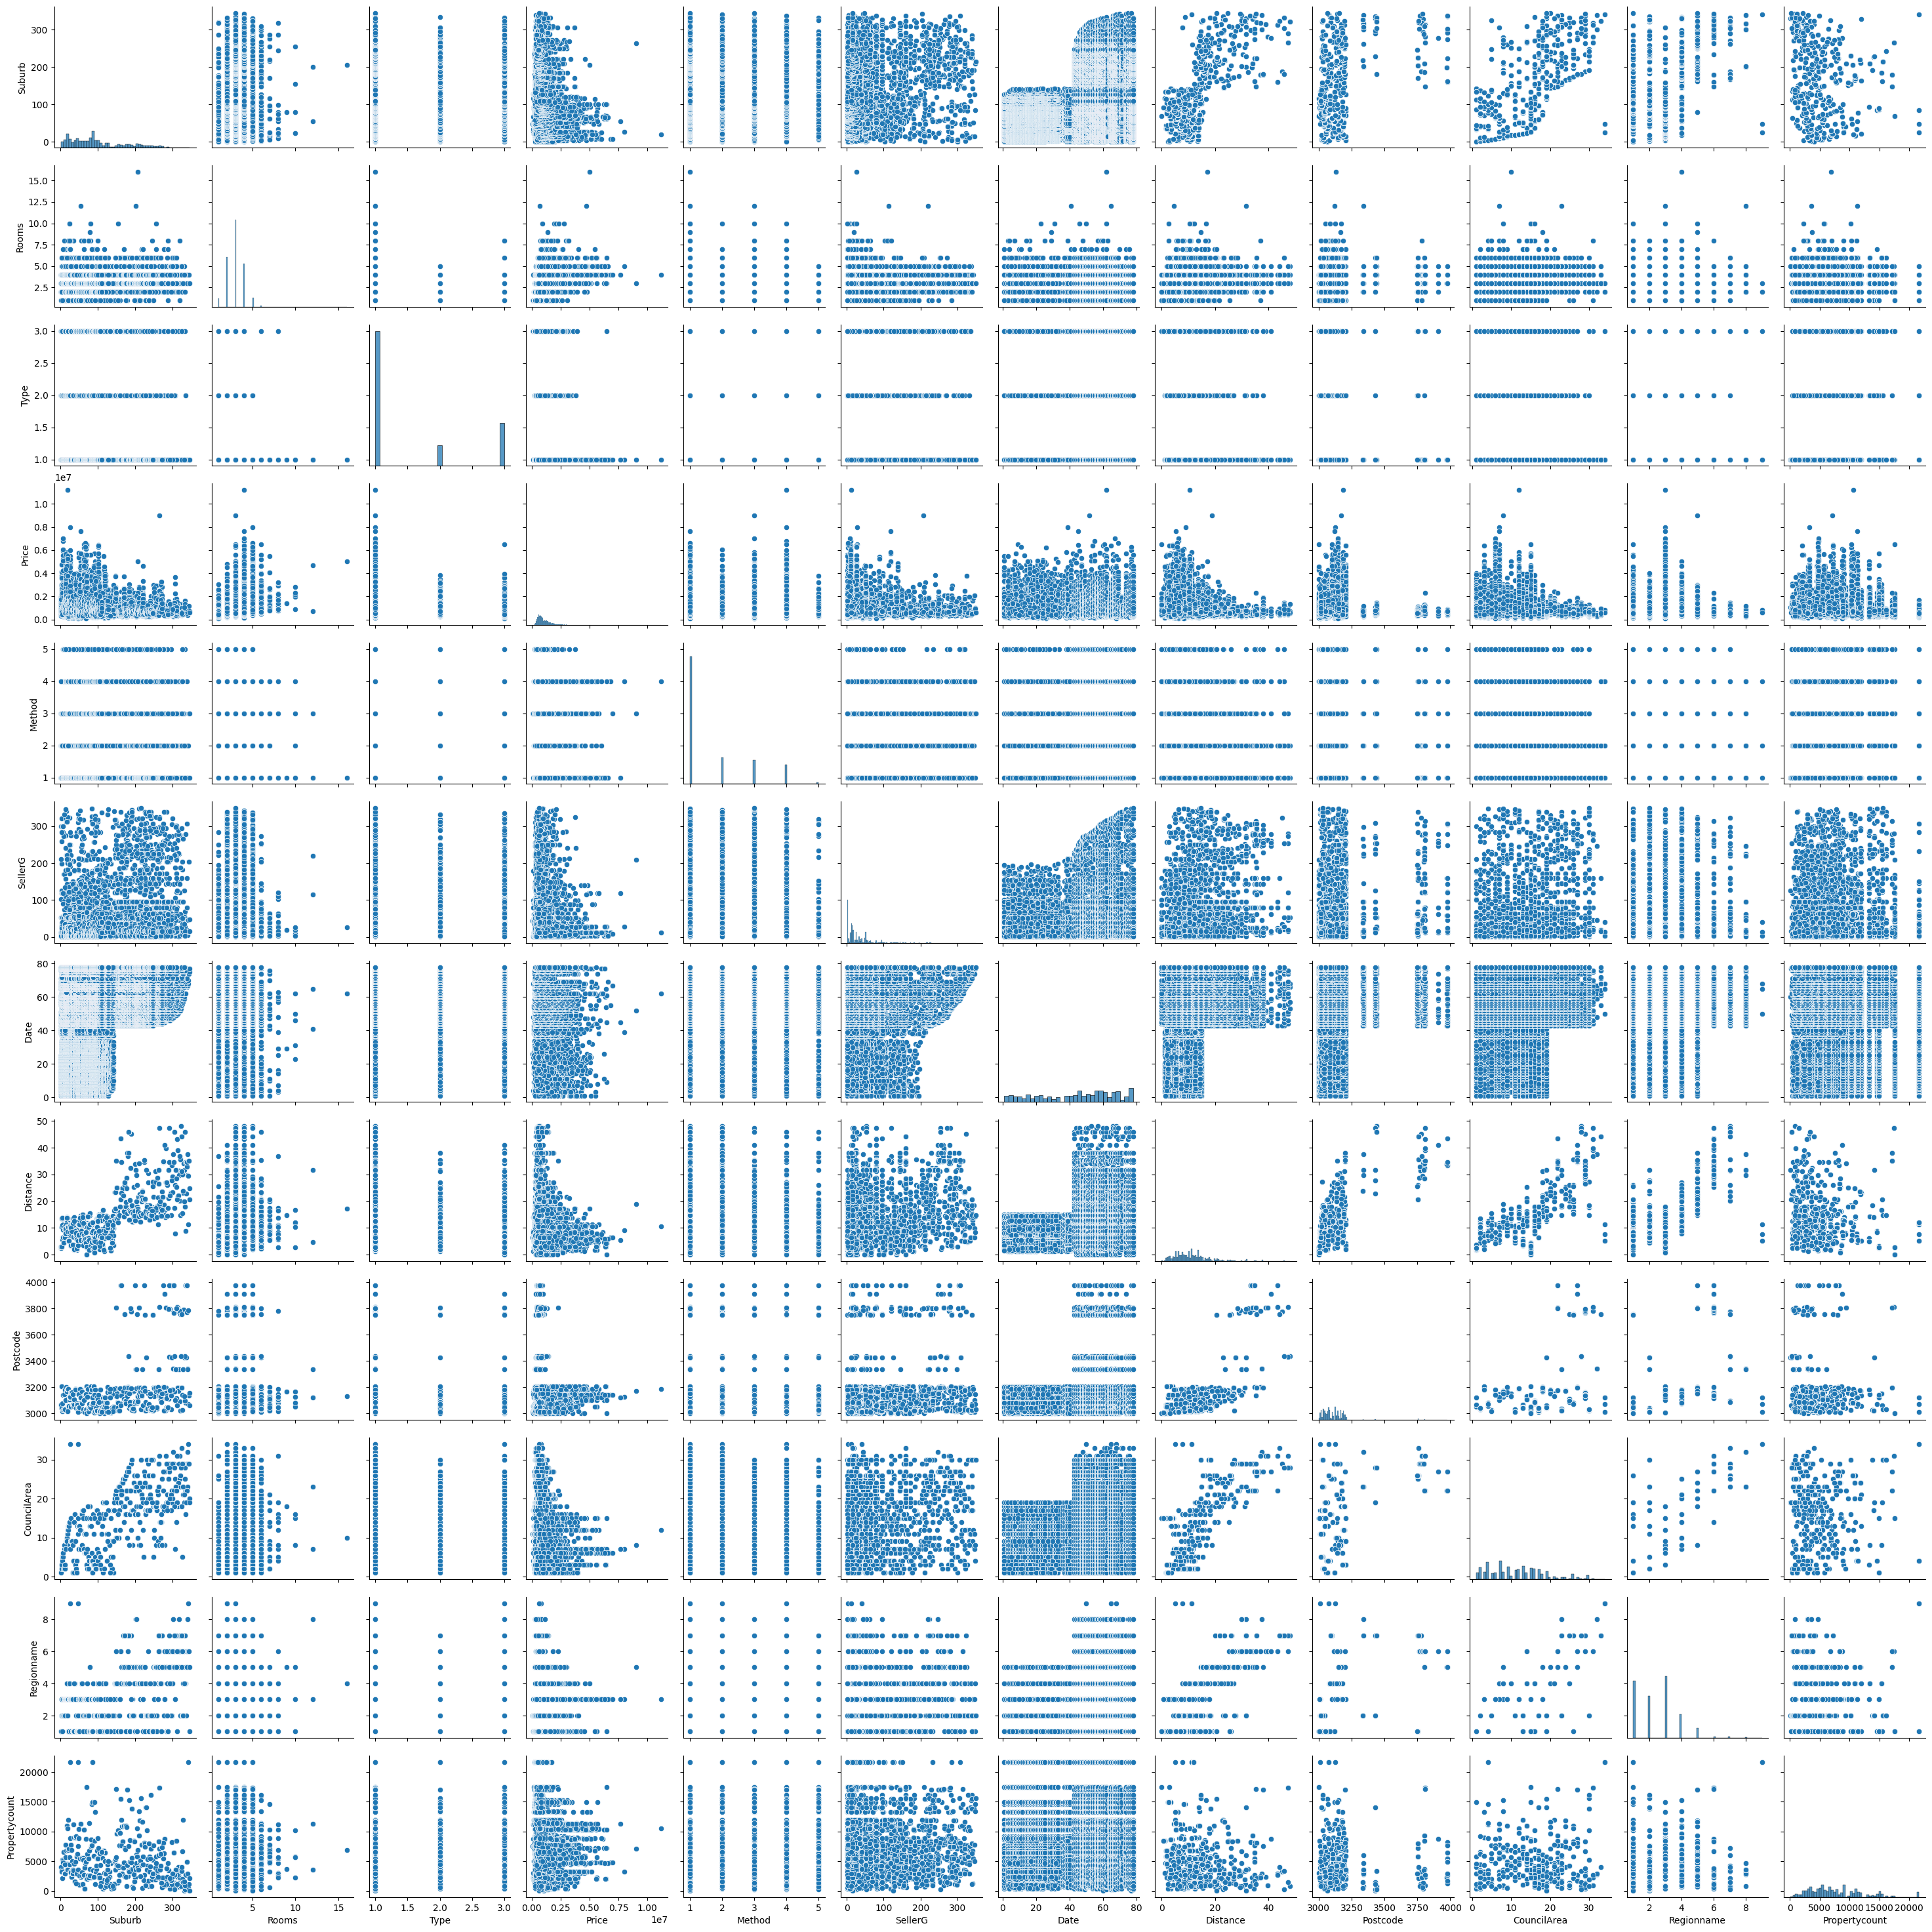

In [17]:
sns.pairplot(df)

In [18]:
treshold = 0.85
high_correlation_pairs = [(col1,col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns if col1!=col2 and abs(correlation_matrix.loc[col1,col2]) > treshold]
print(high_correlation_pairs)

[]


In [19]:
#df.drop(columns=['Address','Date'])

* Low Variance Filter

In [20]:
variances = df.var()
print(variances)

Suburb           5.540641e+03
Rooms            9.116341e-01
Type             6.822460e-01
Price            4.114801e+11
Method           1.125825e+00
SellerG          2.366415e+03
Date             5.114529e+02
Distance         4.606804e+01
Postcode         1.235164e+04
CouncilArea      4.913088e+01
Regionname       1.667926e+00
Propertycount    2.020111e+07
dtype: float64


In [21]:
low_variances= variances[variances < 0.5].index
print(low_variances)
df.drop(columns=low_variances)

Index([], dtype='object')


,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,CouncilArea,Regionname,Propertycount
1,1.0,2.0,1.0,1480000.0,1.0,1.0,1.0,2.5,3067.0,1.0,1.0,4019.0
2,1.0,2.0,1.0,1035000.0,1.0,1.0,2.0,2.5,3067.0,1.0,1.0,4019.0
4,1.0,3.0,1.0,1465000.0,2.0,1.0,3.0,2.5,3067.0,1.0,1.0,4019.0
5,1.0,3.0,1.0,850000.0,3.0,1.0,3.0,2.5,3067.0,1.0,1.0,4019.0
6,1.0,4.0,1.0,1600000.0,4.0,2.0,4.0,2.5,3067.0,1.0,1.0,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34852,109.0,4.0,1.0,1480000.0,3.0,40.0,78.0,6.3,3013.0,11.0,2.0,6543.0
34853,109.0,2.0,1.0,888000.0,2.0,38.0,78.0,6.3,3013.0,11.0,2.0,6543.0
34854,109.0,2.0,2.0,705000.0,1.0,40.0,78.0,6.3,3013.0,11.0,2.0,6543.0
34855,109.0,3.0,1.0,1140000.0,2.0,12.0,78.0,6.3,3013.0,11.0,2.0,6543.0


* Imputed the missing values of reliable features

In [22]:
df.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0
CouncilArea,0


* Sequentail Feature Selection

In [23]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=df.drop(columns='Price')
Y=df['Price']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
model = LogisticRegression(max_iter=10000)
print(df.head())

   Suburb  Rooms  Type      Price  Method  SellerG  Date  Distance  Postcode  \
1     1.0    2.0   1.0  1480000.0     1.0      1.0   1.0       2.5    3067.0   
2     1.0    2.0   1.0  1035000.0     1.0      1.0   2.0       2.5    3067.0   
4     1.0    3.0   1.0  1465000.0     2.0      1.0   3.0       2.5    3067.0   
5     1.0    3.0   1.0   850000.0     3.0      1.0   3.0       2.5    3067.0   
6     1.0    4.0   1.0  1600000.0     4.0      2.0   4.0       2.5    3067.0   

   CouncilArea  Regionname  Propertycount  
1          1.0         1.0         4019.0  
2          1.0         1.0         4019.0  
4          1.0         1.0         4019.0  
5          1.0         1.0         4019.0  
6          1.0         1.0         4019.0  


* Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1000)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=1000)

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import r2_score,accuracy_score
print(r2_score(y_pred,y_test))

0.6150088711944761


In [27]:
feature_scores=pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

Rooms            0.195469
Distance         0.170423
CouncilArea      0.169708
Postcode         0.126632
Date             0.096937
Type             0.076025
SellerG          0.061647
Propertycount    0.039928
Method           0.025935
Suburb           0.023061
Regionname       0.014235
dtype: float64


Text(0, 0.5, 'Features')

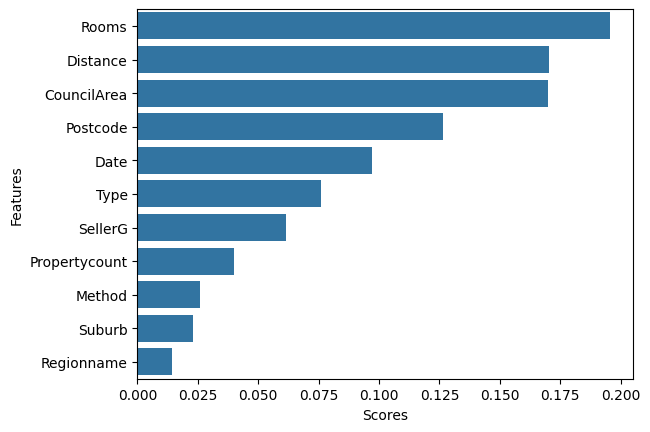

In [28]:
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.xlabel('Scores')
plt.ylabel('Features')